# Artificial Neural Network

## Part 1 - Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path

## Part 2 - Data Preprocessing

### Importing the dataset

In [3]:
#Access input folder
current_dir = Path.cwd()
parent_dir = current_dir.parent
input_dir1 = Path (parent_dir/"Pressure_profiles")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

input H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles
2 [WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_1'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_11'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_13'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_15'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_17'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_19'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_21'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_23'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_25'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_27'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_pr

In [4]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if 12 < int(file_train.stem[1:]) < 26)
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_1
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_11
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_13
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_15
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_17
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_19
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_21
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_23
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_25
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_27
P13
P17
P21
P25
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L

In [1]:
dataset_train.info()

NameError: name 'dataset_train' is not defined

In [6]:
dataset_train = pd.get_dummies(dataset_train, columns =['Phase'])
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524140 entries, 0 to 524139
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        524140 non-null  float64
 1   Standoff_distance  524140 non-null  int64  
 2   Time               524140 non-null  float64
 3   Pressure           524140 non-null  float64
 4   Phase_negative     524140 non-null  uint8  
 5   Phase_positive     524140 non-null  uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 17.0 MB


In [7]:
dataset_train.head(30)

,Charge_mass,Standoff_distance,Time,Pressure,Phase_negative,Phase_positive
0,0.5,7,0.01583,101200.05469,0,1
1,0.5,7,0.01584,101201.00000,0,1
2,0.5,7,0.01585,101217.05469,0,1
3,0.5,7,0.01586,101481.64844,0,1
4,0.5,7,0.01587,105126.66406,0,1
5,0.5,7,0.01588,113668.39844,0,1
6,0.5,7,0.01589,113057.68750,0,1
7,0.5,7,0.01590,113399.80469,0,1
8,0.5,7,0.01591,113217.99219,0,1
9,0.5,7,0.01592,113204.15625,0,1


In [8]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(524140, 5) (524140,)


In [9]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

[[-0.69546102  0.42497572  0.87592566  1.          0.        ]
 [-0.18523102  1.31985855  1.61976847  1.          0.        ]
 [-0.18523102  1.31985855  1.5973392   1.          0.        ]
 ...
 [ 1.24341296 -0.4699071  -1.05405835  1.          0.        ]
 [-1.81796701  1.31985855  0.20940861  1.          0.        ]
 [ 1.34545896  0.42497572  1.3970687   1.          0.        ]]


In [13]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[-1.51182901 -0.4699071  -0.24602571  1.          0.        ]
 [-0.18523102  1.31985855  0.41817859  1.          0.        ]
 [-1.51182901 -1.36478993 -0.37208211  1.          0.        ]
 ...
 [ 0.22295297  1.31985855  0.79163573  1.          0.        ]
 [-0.79750702  0.42497572 -0.05814739  1.          0.        ]
 [-1.92001301  0.42497572 -0.09678953  1.          0.        ]]


In [14]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[-0.89955302 -1.36478993 -0.4540302   1.          0.        ]
 [ 0.22295297 -0.4699071  -1.06411027  1.          0.        ]
 [-1.71592101  1.31985855  0.94242796  1.          0.        ]
 ...
 [ 1.34545896  1.31985855  2.08988986  1.          0.        ]
 [ 0.12090697  1.31985855  1.12954842  1.          0.        ]
 [ 1.44750496 -1.36478993 -0.2483543   1.          0.        ]]


In [15]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 314484
X_test 104828
X_val 104828


## Part 3 - Building the ANN

### Initializing the ANN

In [17]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=200,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))

### Adding the second hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=150,
                              activation='relu'))

### Adding the third hidden layer

In [20]:
ann.add(tf.keras.layers.Dense(units=100,
                              activation='relu'))

### Adding the output layer

In [21]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [22]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1200      
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 46,551
Trainable params: 46,551
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [23]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [24]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [25]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=50,
                    verbose=1)

Epoch 1/500
6290/6290 [==============================] - 22s 3ms/step - loss: 334802464.0000 - mae: 6864.1284 - val_loss: 34825208.0000 - val_mae: 3164.6421
Epoch 2/500
6290/6290 [==============================] - 22s 3ms/step - loss: 29877810.0000 - mae: 2714.8271 - val_loss: 25183044.0000 - val_mae: 2324.6313
Epoch 3/500
6290/6290 [==============================] - 22s 4ms/step - loss: 21171002.0000 - mae: 2188.8416 - val_loss: 17438294.0000 - val_mae: 1952.8104
Epoch 4/500
6290/6290 [==============================] - 22s 4ms/step - loss: 15256462.0000 - mae: 1887.0574 - val_loss: 13595369.0000 - val_mae: 2009.5112
Epoch 5/500
6290/6290 [==============================] - 22s 4ms/step - loss: 10612570.0000 - mae: 1491.1761 - val_loss: 8389046.0000 - val_mae: 1174.8438
Epoch 6/500
6290/6290 [==============================] - 22s 3ms/step - loss: 6703867.5000 - mae: 1114.3690 - val_loss: 5502672.5000 - val_mae: 976.8466
Epoch 7/500
6290/6290 [==============================] - 22s 3ms/st

### Analyse learn history

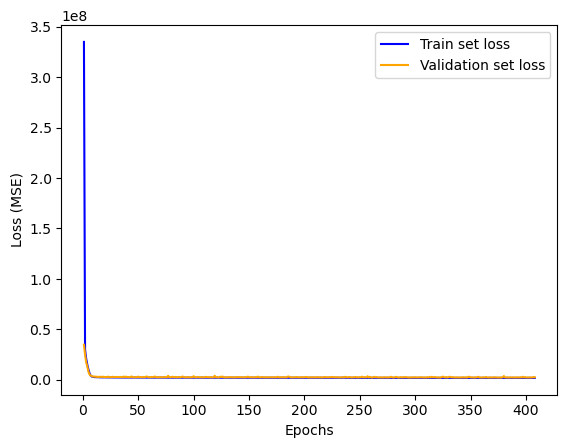

In [26]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

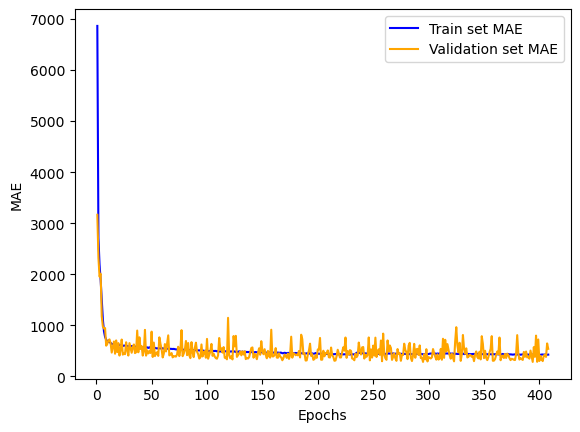

In [27]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [18]:
print (epochs)

range(1, 387)


### Save the model

In [39]:
ann.save('ANN_2.h5')

## Part 5 - Make predictions

In [9]:
ann = load_model('ANN_2.h5')

3276/3276 [==============================] - 7s 2ms/step


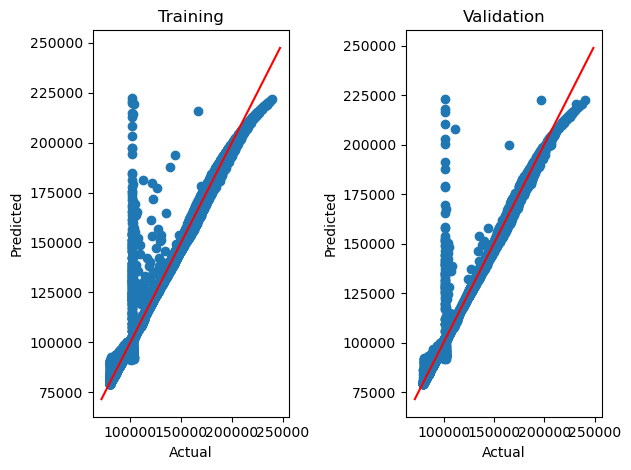

In [28]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [29]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3276/3276 [==============================] - 7s 2ms/step
[[98824.39 99594.57]
 [97925.67 98049.1 ]
 [99961.21 99408.13]
 ...
 [95511.08 95756.94]
 [97612.02 97812.48]
 [99645.41 99330.71]]


Text(0, 0.5, 'Predicted data')

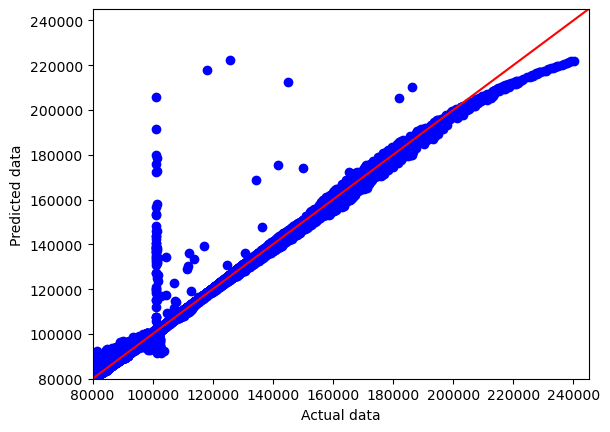

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([80000,245000],[80000,245000], color = "red")
plt.axis ([80000,245000,80000,245000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

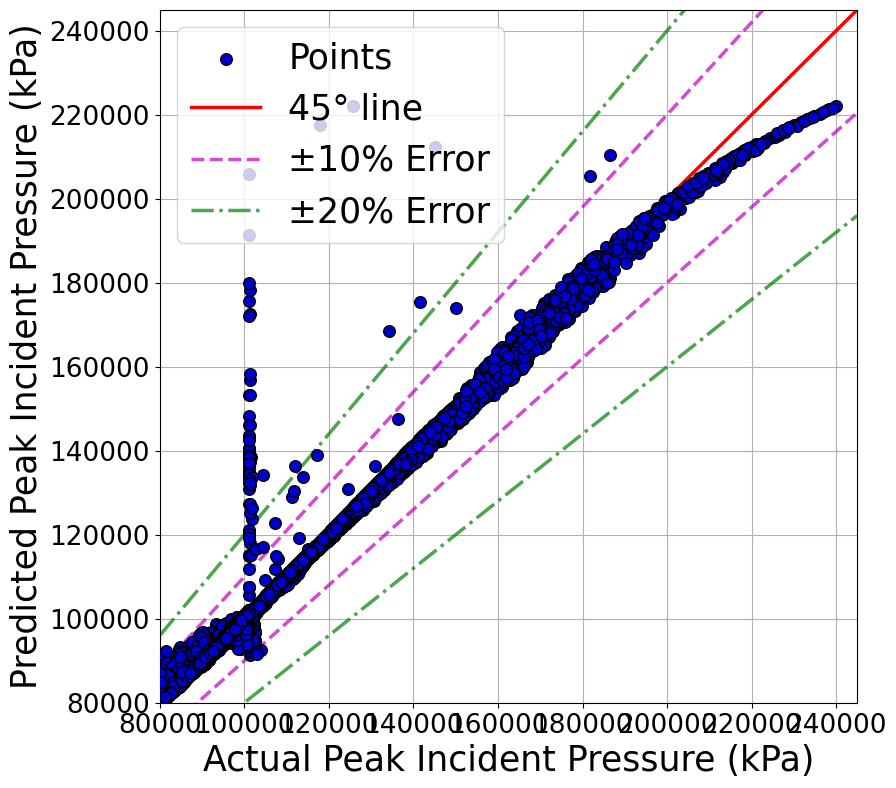

In [31]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(80000,245000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(80000,245000)
plt.xlim(80000,245000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [32]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

9828/9828 [==============================] - 24s 2ms/step
297.2396621567711
299.10107106890814


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9879360092355548


In [34]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9865226547867445


In [35]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 99.92%
Within 20% margin 99.95%
Out of 20% margin 0.05%


In [36]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9879354337842772


In [37]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

1290.1672677226077

In [38]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

299.10107106890814